In [1]:
using Catalyst
using DifferentialEquations
using ReactionNetworkImporters
using WGLMakie
using Latexify
using ModelingToolkit

In [2]:
@variables t
@species X(t) Xt(t) Xp(t) Y(t) Yp(t)
@parameters k1 k2 k3 k3
rn = @reaction_network begin
    k1, X --> Xt
    k2, Xt --> Xp
    k3, Xp+Y --> X + Yp
    k4, Xt+Yp --> Xt+Y
end

Model ##ReactionSystem#231
Unknowns (5):
  X(t)
  Xt(t)
  Xp(t)
  Y(t)
  Yp(t)
Parameters (4):
  k1
  k2
  k3
  k4

In [3]:
odesys=convert(ODESystem,rn) # the corresponding system of ODEs

Model ##ReactionSystem#231 with 5 equations
Unknowns (5):
  X(t)
  Xt(t)
  Xp(t)
  Y(t)
  Yp(t)
Parameters (4):
  k1
  k2
  k3
  k4

In [4]:
conservationlaws(rn) # conservation laws 

2×5 Matrix{Int64}:
 1  1  1  0  0
 0  0  0  1  1

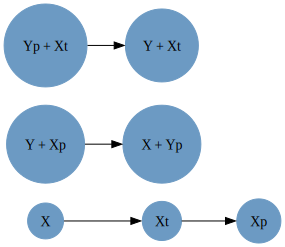

In [5]:
complexgraph(rn)

In [6]:
deficiency(rn)

1

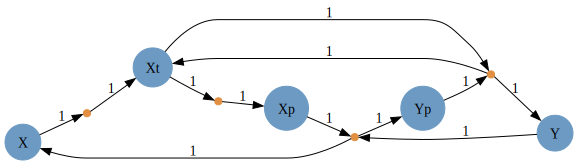

In [7]:
Graph(rn) # the Volpert graph

In [8]:
netstoichmat(rn) # the stoichiometric matrix

5×4 Matrix{Int64}:
 -1   0   1   0
  1  -1   0   0
  0   1  -1   0
  0   0  -1   1
  0   0   1  -1

In [9]:
prodstoichmat(rn)

5×4 Matrix{Int64}:
 0  0  1  0
 1  0  0  1
 0  1  0  0
 0  0  0  1
 0  0  1  0